# __Kaggle Project 2 - House Prices__

#### Nick Tedesco

CURRENT POSITION: 1255
CURRENT SCORE: 0.13534

This document contains my workflow for completing the Housing Prices - Advanced Regression Techniques project on Kaggle. The core components of my code can be divided as follows:

    1. Exploratory Data Analysis (EDA)
    2. Data Preprocessing
        - Dealing with missing values
        - Feature selection
        - Feature engineering
        - Feature scaling
        - Dealing with outliers
        - One-hot encoding
    3. Statistical Modeling
        - Random forest
        - Gradient boosting
        - XGBoost
        - Model stacking (using first three models)
        - Neural network
    4. Predictions and Submission File

In the statistical modeling section, models were assessed using cross-validated root mean squared error. The best performing model was chosen for final submission. 

*NOTE*: There are a few areas of this workflow that could be improved. More specifically:

    - My feature selection techniques were relatively subjective
    - Outside of scaling, I did not apply transformations to the continuous predictors
    - I'm not sure if it would be beneficial to collapse some of the categorical variables
    - My selection of hyperparameters using GridSearchCV could have been more expansive

I will continue to update this notebook and my submission in the future - having said this, any constructive feedback would be greatly appreciated! 

## **Package and Data Loading**

In [29]:
## base packages
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import statistics as stat
import numpy as np

## data viz
import seaborn as sns
import seaborn.objects as so
import matplotlib.figure as fig
import matplotlib.pyplot as plt
%matplotlib inline

## preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV

## neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
train = pd.read_csv("train.csv")

## take a look at the training set
train.head(n = 10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [31]:
test = pd.read_csv("test.csv")

In [32]:
## extract outcome variable from training data
y = train['SalePrice']

## label training and testing datasets
train['train'] = "yes"
test['train'] = "no"

## drop outcome for train and combine with test
data = pd.concat([train.drop(columns = 'SalePrice'), test])

## **Exploratory Data Analysis**

Now, we'll take a closer look at our variables and their distributions.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Categorical Variables

Next, let's inspect the class distributions for each of our categorical variables. 

In [34]:
## extract names of categorical variables
categorical_var = list(data.select_dtypes(exclude='number').columns.values)
categorical_var.remove('train')

## print level distribution for each variable
for var in categorical_var:
    print(data[var].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, 

For a few of our categorical variables, we have levels with extremely low proportions (ex: LandContour). We will have to deal with these variables during cleaning / preprocessing. 

### Numeric / Continuous Variables

Now, let's visualize the distributions of our numeric / continuous variables by plotting histograms. 

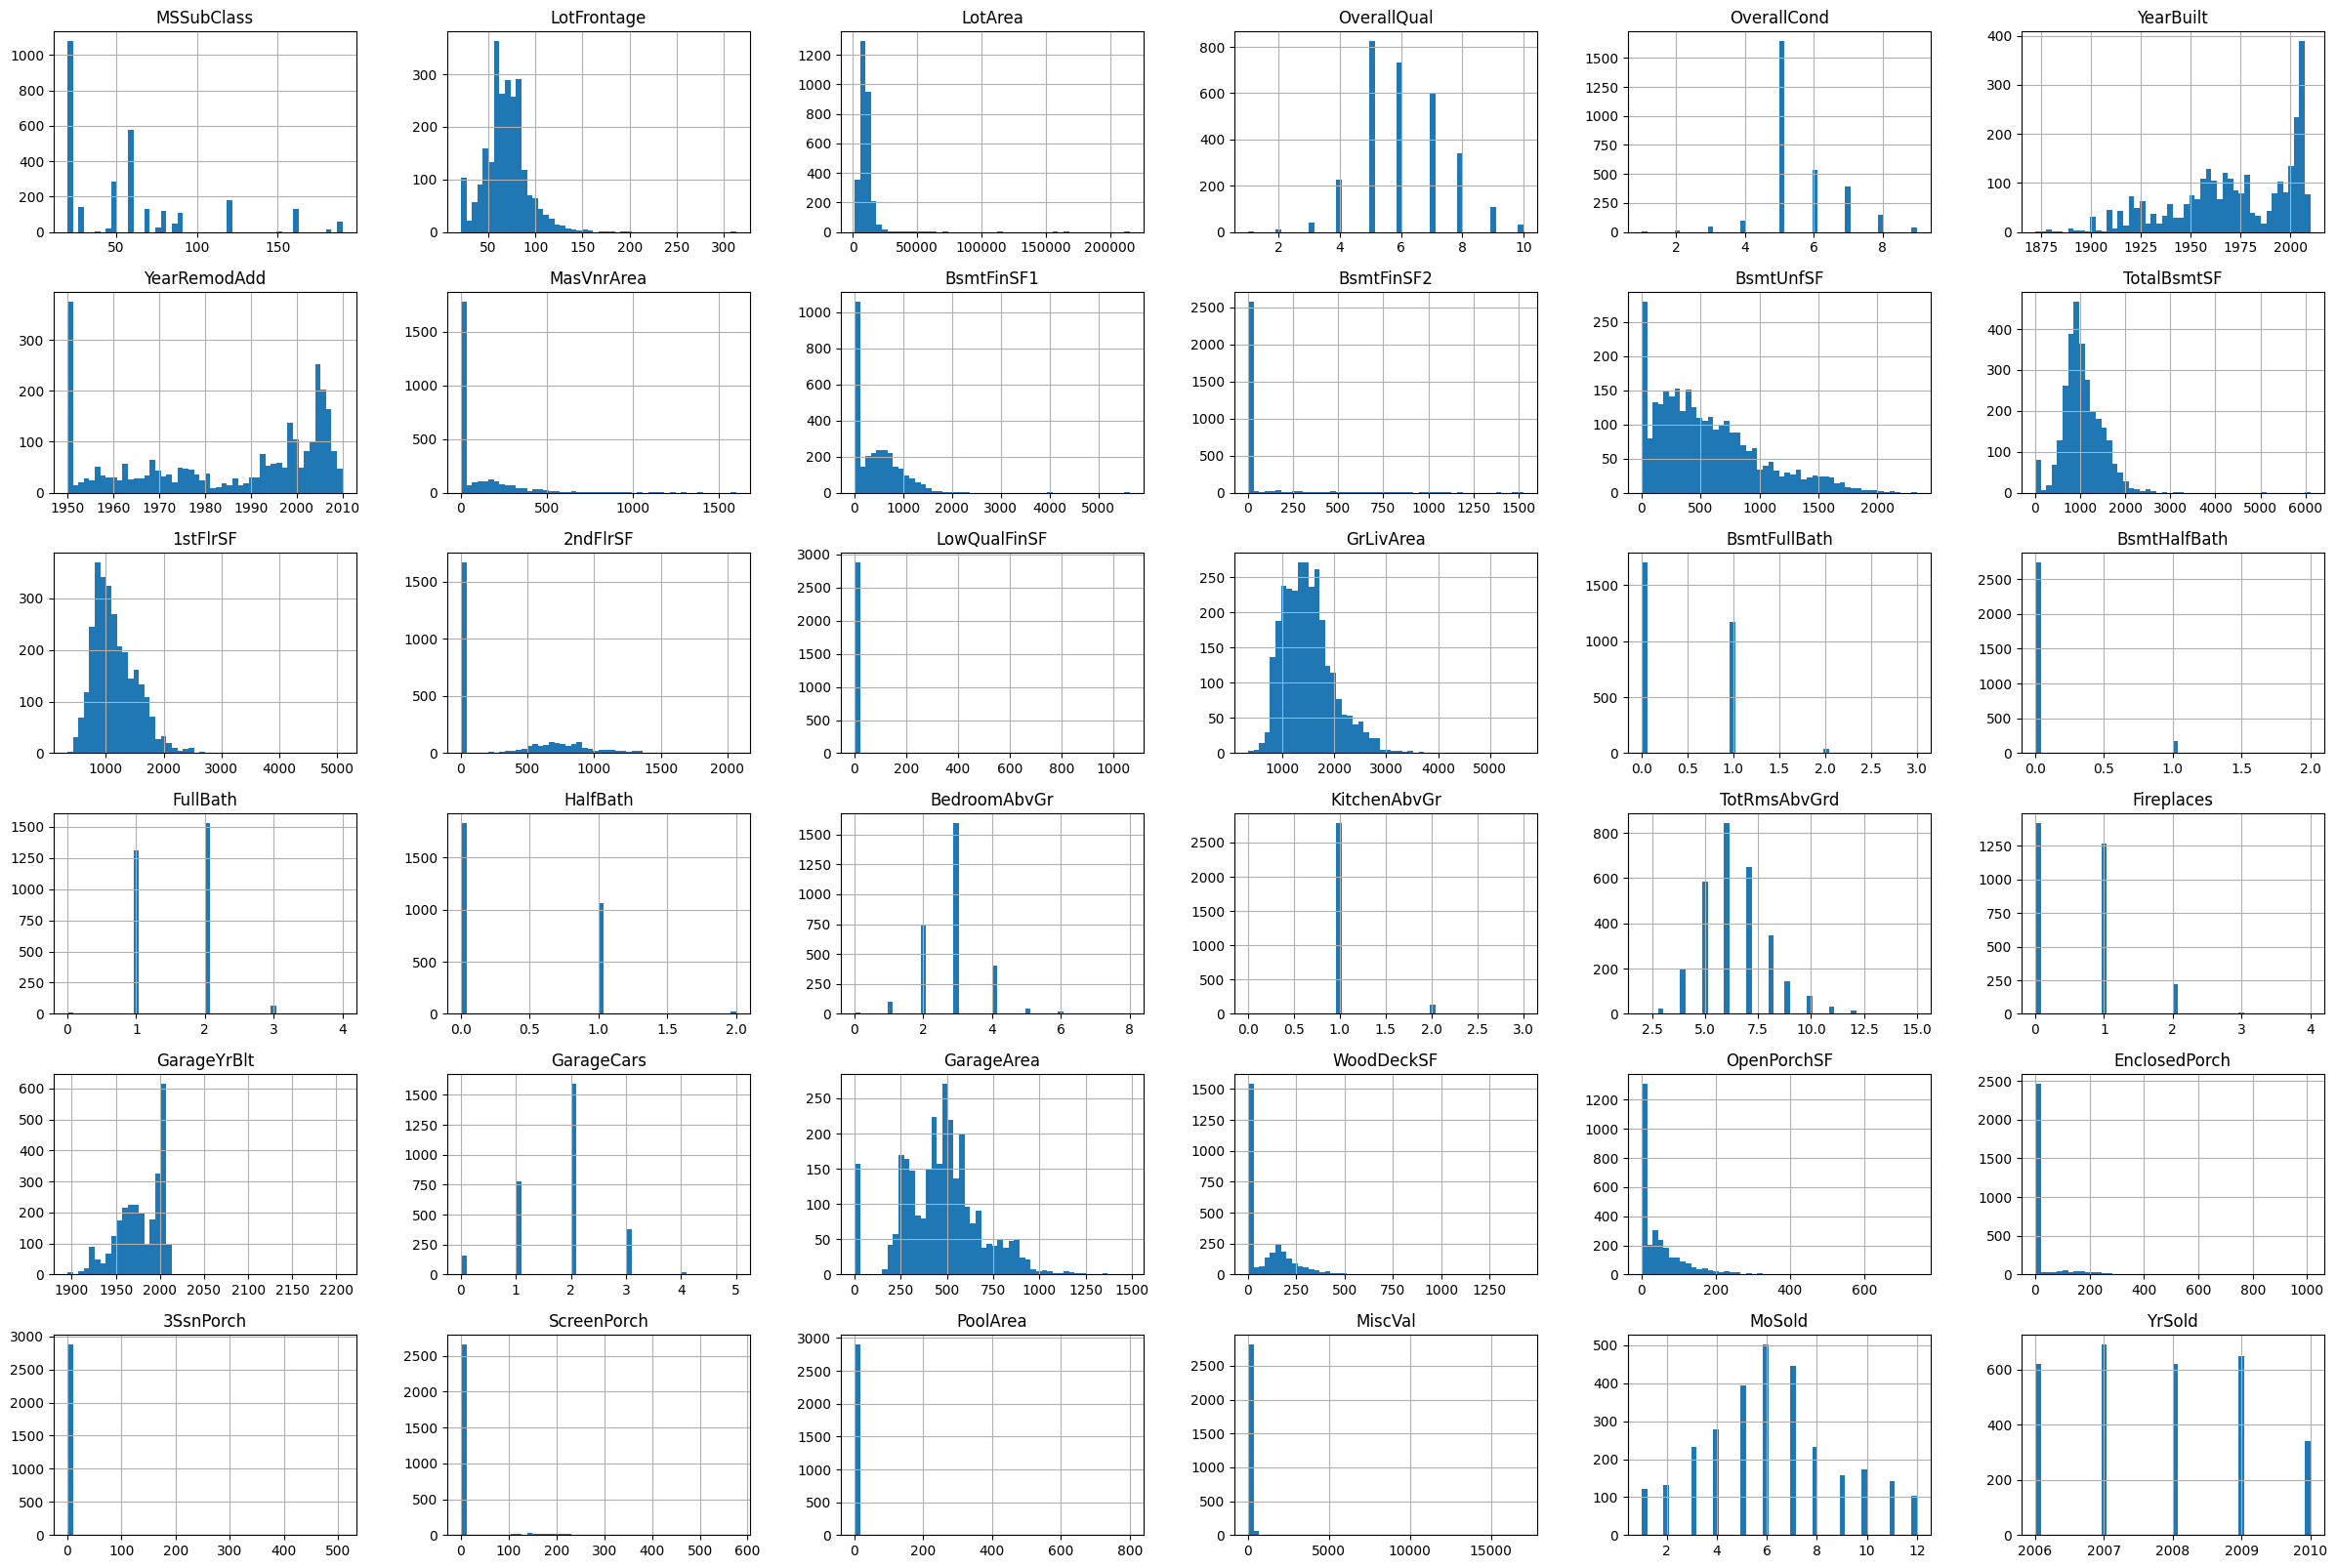

In [35]:
data.drop(columns = "Id").hist(bins = 50, figsize = (30, 20));

It's clear that a few of our numeric variables are technically categorical (ex: OverallQual). We'll have to deal with this during preprocessing. Additionally, it looks like a few variables have some noticable outliers (ex: GarageYrBlt, EnclosedPorch). 

### Univariate Relationships to Outcome

Here, we will look at the relationships between each of our predictors and the outcome variable.

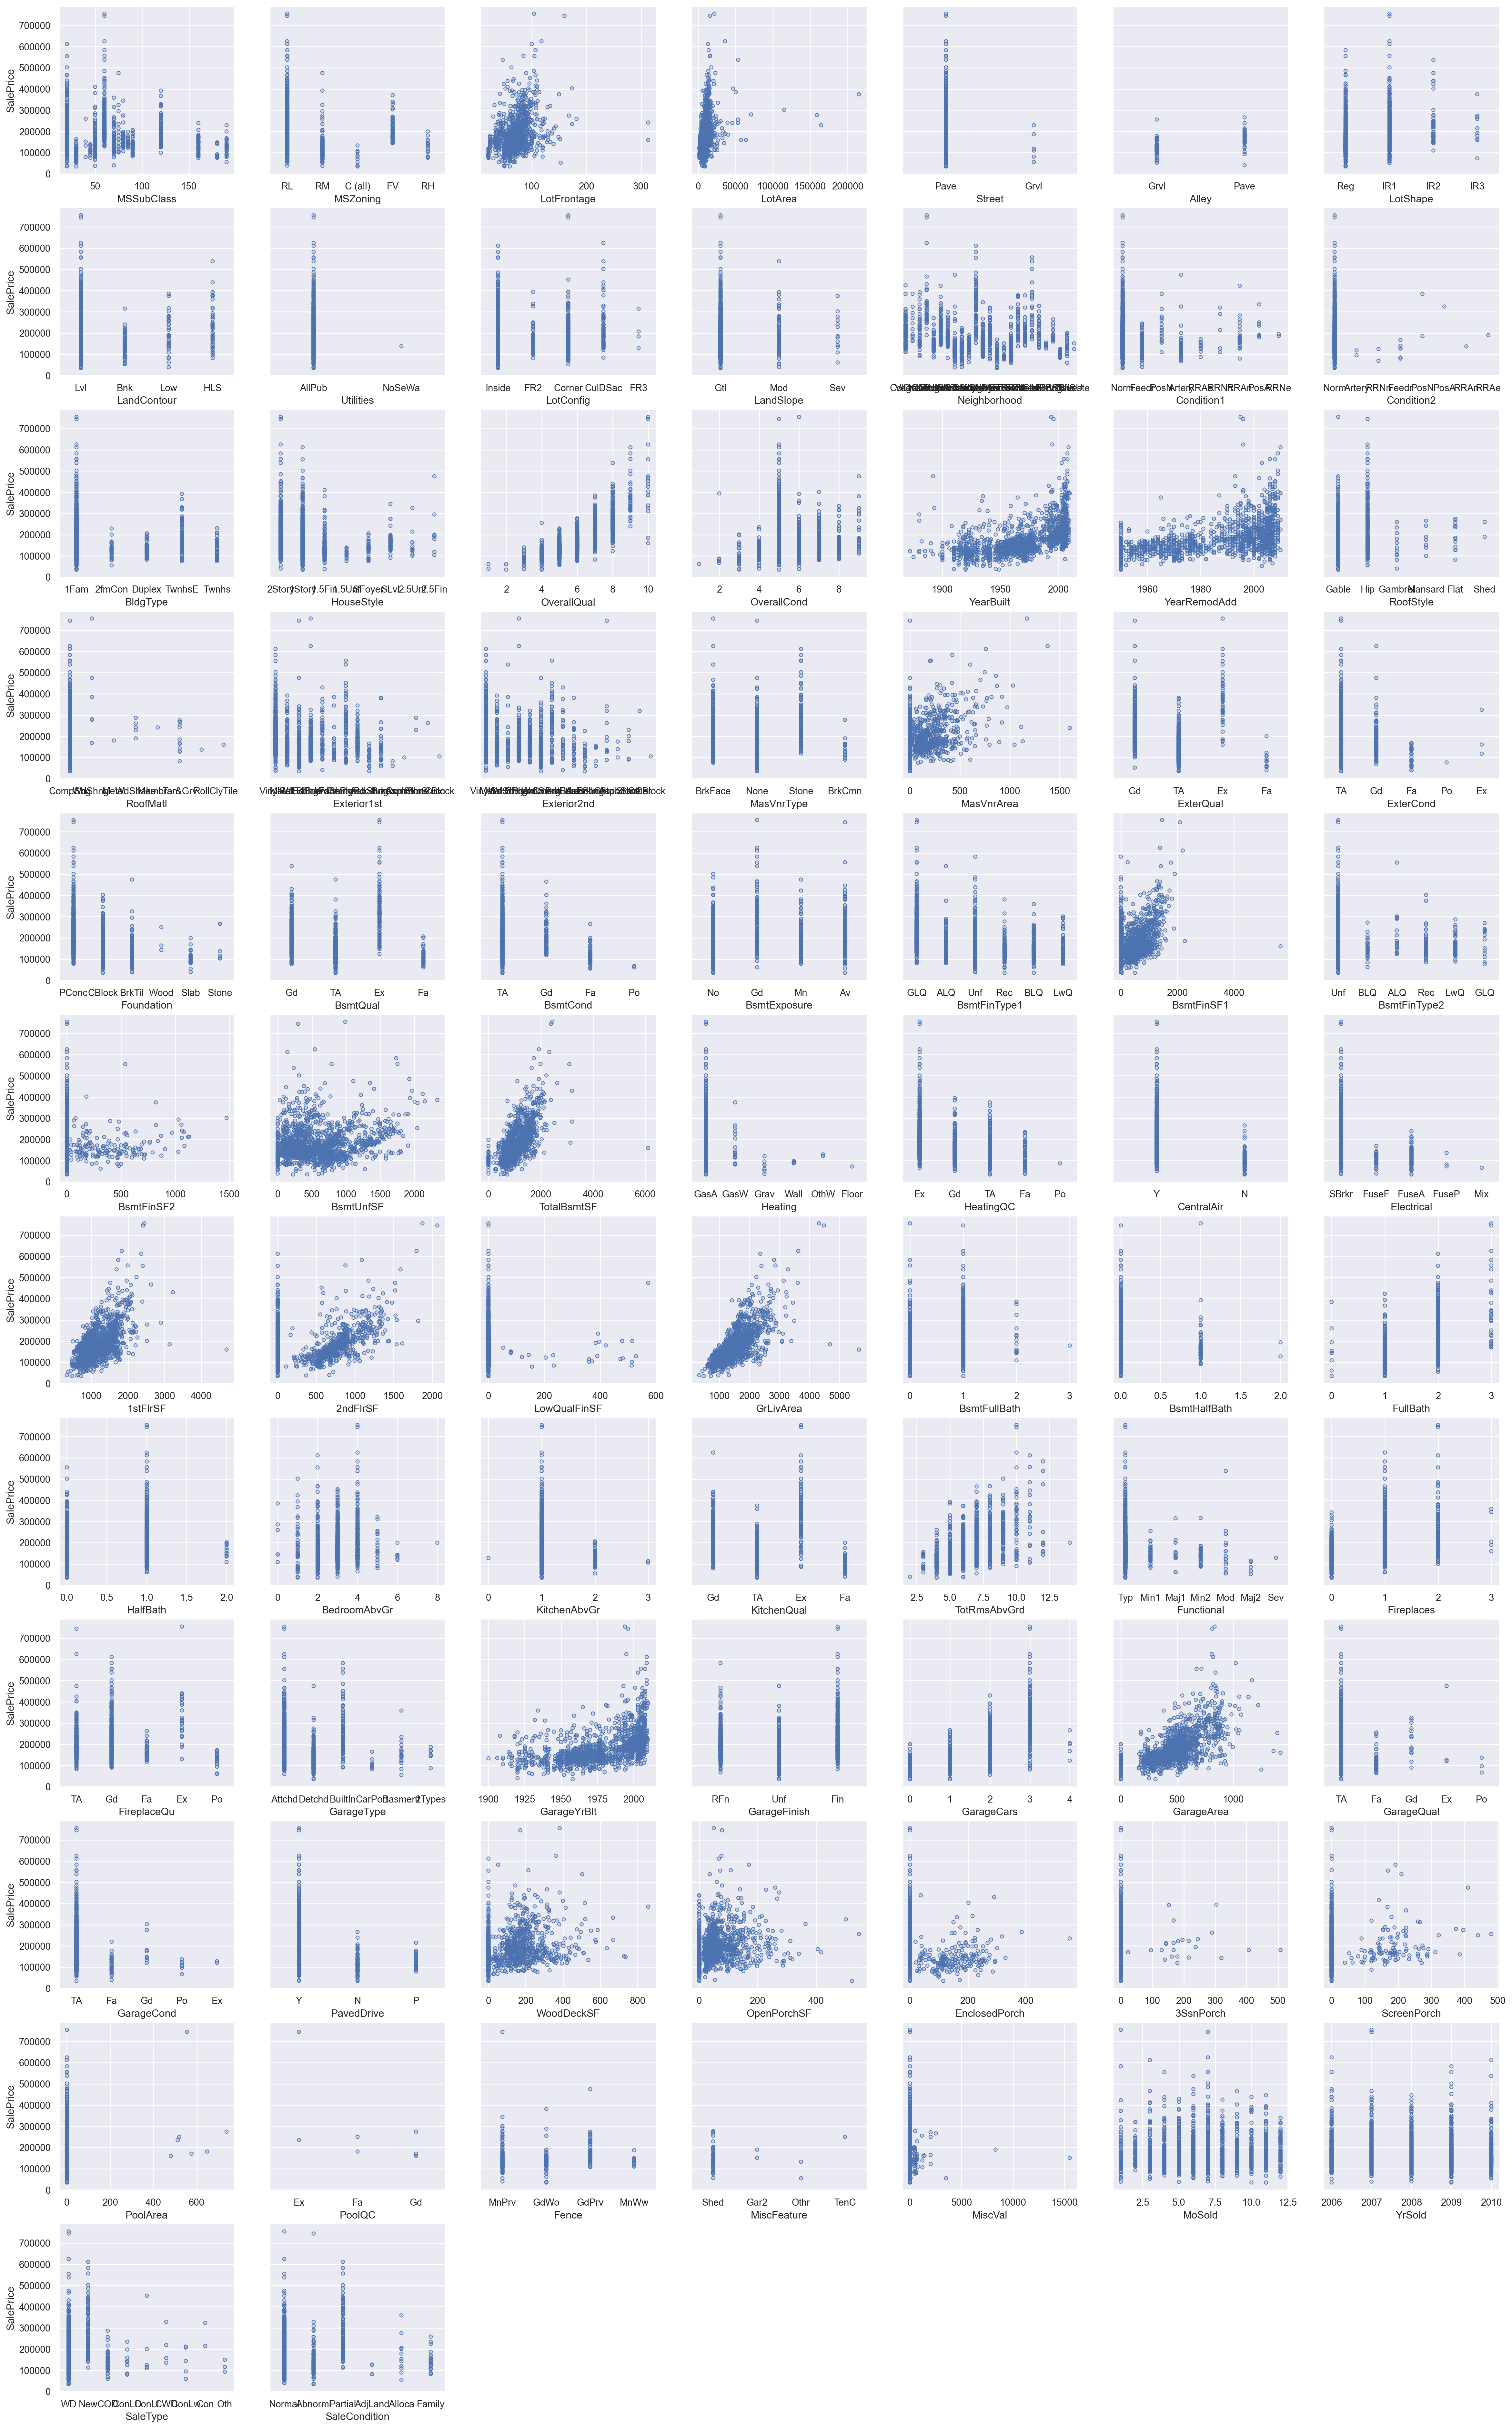

In [36]:
X = data[data['train'] == "yes"].drop(columns = ['train', 'Id'])

eda_data = pd.concat([X, y], axis = 1)

f = fig.Figure(figsize=(30, 50))

var = X.columns

(
    so.Plot(eda_data, y="SalePrice")
    .pair(x=var, wrap=7)
    .add(so.Dots())
    .on(f)
    .plot()
)

### Missing Values

Finally, let's take a look at the distribution of missing values in our dataset. 

In [37]:
na_prop = data.isna().sum() / len(data)

na_prop.sort_values(ascending = False)[na_prop > 0]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Functional      0.000685
Utilities       0.000685
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
GarageArea      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
GarageCars      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
KitchenQual     0.000343
TotalBsmtSF     0.000343
BsmtFinSF2      0.000343
dtype: float64

Some of our variables have extremely high missing value proportions (PoolQC, MiscFeature, etc.). It would probably be best to simply drop them - for example, a variable with 99% missing values is not likely to help us predict our outcome. 

## **Data Preprocessing**

### **Addressing Missing Values**

First, let's simply drop the columns with missing value proportions greater than 0.40. 

In [38]:
missing_drop_columns = na_prop.sort_values(ascending = False)[na_prop > 0.40].index.to_list()

data.drop(columns = missing_drop_columns, inplace = True)

Next, we have to deal with the remainder of our missing values.

After reading the data description provided by Kaggle, I discovered that many variables use NA to indicate that the house does not have a given feature. For example, NA is used to indicate "No pool" for the PoolQC variable. Therefore, we will simply replace NA values with "None" for each of the applicable variables. Similarly, continuous variables for features that are not applicable to the given house will be filled in with 0.

With this information in mind, let's define a function to deal with our missing values. 

In [39]:
def clean_missing_values(df, na_means_none_col):

    categorical_col = list(df.select_dtypes(exclude='number').columns.values)
    numeric_col = list(df.select_dtypes(exclude='object').columns.values)

    for col in categorical_col:
        if col in na_means_none_col:
            data[col].fillna(value = "None", inplace = True)
        else:
            
            data[col].fillna(value = stat.mode(data[col]), inplace = True)

    for col in numeric_col:
        if col in na_means_none_col:
            data[col].fillna(value = 0, inplace = True)
        else:
            data[col].fillna(value = data[col].mean(), inplace = True)

In [40]:
na_equals_none_columns = ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarcolArea', 'BsmtFinSF1', 'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2']

clean_missing_values(data, na_equals_none_columns)

Finally, let's check to make sure all of our missing values have been addressed. 

In [41]:
na_prop = data.isna().sum() / len(data)

na_prop.sort_values(ascending = False)[na_prop > 0]

Series([], dtype: float64)

### **Feature Selection**

As shown in the EDA section, some of our categorical variables have very poor balance between their levels (ex: Street, LandContour). This poor balance will only serve to degrade the performance of our machine learning algorithms.

High cardinality variables can also negatively impact our predictors. Some of our variables (ex: Neighborhood) have WAY too many levels. 

Finally, the EDA section also indicates that some of our variables are not signficantly related to our outcome. 

Let's drop all of these variables to improve the quality of our final models. 

In [42]:
## define factor variables with poor balance (somewhat subjective)
imbalanced_columns = ["Street", "LandContour", "Condition2", "RoofMatl", "Heating", "MSSubClass", "Neighborhood", "MiscVal", "BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "Exterior1st", "Exterior2nd", "Utilities", "MoSold", "YrSold"]

## remove imbalanced variables from dataset
data.drop(columns = imbalanced_columns, inplace = True)

### **Feature Engineering**

Now we can move into some feature engineering. After reading through the variables and their descriptions, it seems like some variables can be combined / transformed in order to be more practical in predicting house price. 

### Total Bath

Two variables in this dataset describe baths - FullBath and HalfBath. Let's add these variable together to get TotalBath. 

In [43]:
## create TotalBath variable
data["TotalBath"] = data["FullBath"] + 0.5 * data["HalfBath"]

## add old variables to list
old_var = ["FullBath", "HalfBath"]

## check to make sure TotalBath was successfully created
data[["FullBath", "HalfBath", "TotalBath"]].head()

FullBath  HalfBath  TotalBath
0         2         1        2.5
1         2         0        2.0
2         2         1        2.5
3         1         0        1.0
4         2         1        2.5

### TotalSF

Similarly, we have a few variables describing square footage - TotalBsmtSF, 1stFlrSF, and 2ndFlrSF. Let's add these variables together to get TotalSF

In [44]:
## create TotalSF variable
data["TotalSF"] = data["TotalBsmtSF"] + data["1stFlrSF"] + data["2ndFlrSF"]

## add old variables to list
old_var.extend(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"])

## check to make sure TotalSF was successfully created
data[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotalSF"]].head()

TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0        856.0       856       854   2566.0
1       1262.0      1262         0   2524.0
2        920.0       920       866   2706.0
3        756.0       961       756   2473.0
4       1145.0      1145      1053   3343.0

Finally, let's create a dataset that excludes our old variables. 

In [45]:
data.drop(columns = old_var, inplace = True)

### **Continuous Feature Scaling**

Many machine learning algorithms require continuous variables to be scaled (i.e., converted to same unit length). We will use StandardScaler to scale our continuous variables. 

In [46]:
## define continuous variables
continuous_var = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "TotalSF"]

## initiate and apply StandardScaler
scaler = StandardScaler()

data[continuous_var] = scaler.fit_transform(data[continuous_var])

### **Dealing with Outliers**

Next, let's address the outliers in our data. We will replace outliers by flooring/capping at the 15th and 85th percentiles for each continuous variable.

In [47]:
def outlier_func(df, continuous_col):

    ## extract column of interest
    sample = df[continuous_col]

    ## calculate percentiles
    tenth_percentile = np.percentile(sample, 0.10)
    ninetieth_percentile = np.percentile(sample, 0.90)

    ## replace outliers with capped/floored value
    output = np.where(sample < -6, tenth_percentile, sample)
    output = np.where(sample > 6, ninetieth_percentile, output)

    ## return results
    return(output)


In [48]:
for feature in continuous_var:
    data[feature] = outlier_func(data, feature)

### **One Hot Encoding**

In order to use many machine learning algorithms, we have to make sure that we one hot encode our categorical variables.

In [49]:
categorical_var = list(data.select_dtypes(exclude='number').columns.values)
categorical_var.remove("train")
## numeric_categorical_var = ["OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "TotalBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars"]
## categorical_var.extend(numeric_categorical_var)

data = pd.get_dummies(data, columns = categorical_var)

### **Train/Test Reassignment**

Finally, let's split our data back into the training and testing sets. 

In [50]:
X = data[data['train'] == "yes"].drop(columns = ['train', 'Id'])
test = data[data['train'] == "no"].drop(columns = ['train'])

## **Statistical Modeling**

Let's start by manually splitting our data into training and holdout sets. The holdout set will be used to estimate our model's performance after hyperparameter tuning. Hyperparameter tuning will be performed via cross validation within the training set. 

In [51]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.20, random_state = 15213)

We should also define a custom function for evaluating model performance. This competition assesses model performance using RMSE between the logarithm of both the predicted and actual sale price. 

In [52]:
def model_eval(model_obj, holdout_X, holdout_y):

    pred = model_obj.predict(holdout_X)

    log_pred = np.log10(pred)
    log_labels = np.log10(holdout_y)

    rmse = np.sqrt(np.mean(np.square(log_pred - log_labels)))

    print("log RMSE:", rmse)

Now, let's fit our models. First, I will fit three base models using random forest, gradient boosting, and xgboost. For each of these models, I will also use GridSearchCV to select the best set of hyperparameters. Then, I will fit a model using stacking, with each of the first three tuned models as inputs. Finally, I will fit a neural network.

### Part 1: Random Forest

In [53]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

model_eval(rf, X_holdout, y_holdout)

log RMSE: 0.0606156068702432


In [58]:
rf_params = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'max_features': ["auto", "sqrt", "log2"],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

rf_GridSearch = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = rf_params, 
    cv = 3,
    n_jobs = -1
)

rf_GridSearch.fit(X, y)

rf_tuned = rf_GridSearch.best_estimator_

In [55]:
rf_tuned.fit(X_train, y_train)

model_eval(rf_tuned, X_holdout, y_holdout)

log RMSE: 0.06021842532784956


### Part 2: Gradient Boosting

In [56]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

model_eval(gb, X_holdout, y_holdout)

log RMSE: 0.057821963459846526


In [57]:
gb_params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_split': [2, 3, 4], 
    'min_samples_leaf': [1, 2, 3, 4], 
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

gb_GridSearch = GridSearchCV(
    estimator = GradientBoostingRegressor(), 
    param_grid = gb_params, 
    cv = 3,
    n_jobs = -1
)

gb_GridSearch.fit(X, y)

gb_tuned = gb_GridSearch.best_estimator_

In [59]:
gb_tuned.fit(X_train, y_train)

model_eval(gb_tuned, X_holdout, y_holdout)

log RMSE: 0.05937806828571369


### Part 3: XGBoost

In [60]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

model_eval(xgb, X_holdout, y_holdout)

log RMSE: 0.06383652678830931


In [61]:
xgb_params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_split': [2, 3, 4], 
    'min_samples_leaf': [1, 2, 3, 4], 
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

xgb_GridSearch = GridSearchCV(
    estimator = GradientBoostingRegressor(), 
    param_grid = gb_params, 
    cv = 3,
    n_jobs = -1
)

xgb_GridSearch.fit(X, y)

xgb_tuned = xgb_GridSearch.best_estimator_

In [63]:
xgb_tuned.fit(X_train, y_train)

model_eval(xgb_tuned, X_holdout, y_holdout)

log RMSE: 0.05956919897070715


### Part 4: Model Stacking

In [64]:
models = [('rf', rf_tuned), ('gb', gb_tuned), ('xgb', xgb_tuned)]
stack = StackingRegressor(estimators = models)

stack.fit(X_train, y_train)

model_eval(stack, X_holdout, y_holdout)

log RMSE: 0.058722945957772076


### Part 5: Neural Network

Here, I will construct a neural network to predict housing price given our features. 

In [249]:
neural_net = Sequential(
    [
        tf.keras.Input(X_train.shape[1]), 
        
        Dense(units = 100, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)), 
        Dense(units = 50, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)), 
        Dense(units = 25, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)), 
        Dense(units = 1, activation = "linear")
        
    ], name = "neural_net"
)

In [250]:
neural_net.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

neural_net.fit(
    X_train, y_train,
    epochs = 100
)

Epoch 1/100
37/37 [==============================] - 0s 745us/step - loss: 39898505216.0000
Epoch 2/100
37/37 [==============================] - 0s 690us/step - loss: 37386272768.0000
Epoch 3/100
37/37 [==============================] - 0s 662us/step - loss: 25063858176.0000
Epoch 4/100
37/37 [==============================] - 0s 662us/step - loss: 7886961152.0000
Epoch 5/100
37/37 [==============================] - 0s 621us/step - loss: 6119772160.0000
Epoch 6/100
37/37 [==============================] - 0s 662us/step - loss: 6098692608.0000
Epoch 7/100
37/37 [==============================] - 0s 607us/step - loss: 6081094656.0000
Epoch 8/100
37/37 [==============================] - 0s 621us/step - loss: 6087517696.0000
Epoch 9/100
37/37 [==============================] - 0s 607us/step - loss: 6053568512.0000
Epoch 10/100
37/37 [==============================] - 0s 635us/step - loss: 6058334208.0000
Epoch 11/100
37/37 [==============================] - 0s 621us/step - loss: 6042807296

In [251]:
pred = neural_net.predict(X_holdout).flatten()

log_pred = np.log10(pred)
log_labels = np.log10(y_holdout)

rmse = np.sqrt(np.mean(np.square(log_pred - log_labels)))

print("RMSE:", rmse)

10/10 [==============================] - 0s 552us/step
RMSE: 0.06726967642258211


## **Predictions**

Finally, let's make predictions on the test set using our best model, and write them to a csv file for submission. 

In [65]:
stack_pred = stack.predict(test.drop(columns = "Id"))

submission = pd.DataFrame({"Id": test["Id"], "SalePrice": stack_pred.tolist()})

In [66]:
submission.to_csv("submission.csv", index=False)